# CS109b Final Project

# Milestone1

by Danqing Wang, Wenshan Zheng, Zecai Liang
______________

In [8]:
# import libraries
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import random

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 1. Data Extraction


### 1.1 Accessing TMDB and IMDB Data

#### 1.1.1 API code to access the genre and movie poster your favorite movie from TMDB

In [9]:
# import libraries
import urllib
from bs4 import BeautifulSoup
import time
import re
import tmdbsimple as tmdb
tmdb.API_KEY = '4074d0170761c40d9c07d9016ddd4965'

In [10]:
# set up some basic url link strings, to be used later
APIKeyZ = "api_key=4074d0170761c40d9c07d9016ddd4965"
base_url_search = "https://api.themoviedb.org/3/discover/movie?"
popular_desc = "&sort_by=popularity.desc"
year =  "&primary_release_year={}"
page_number = '&page={}'
query_url = 'https://api.themoviedb.org/3/movie/{}?'
poster_url = "http://image.tmdb.org/t/p/{size}/{path}"
poster_size = ["w92", "w154", "w185", "w342", "w500", "w780", "original"]

In [11]:
# use Beauty and Beast (released in 2017) as an example
movie_name = "beauty and the beast"
# set up the link to search for the movie
movie_url = base_url_search + APIKeyZ + "&query=" + movie_name + year.format(2017)

# take out the TMDB ID and extract details about the movie
page = urllib.urlopen(movie_url).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
id_index = prettified.find('"id"') #find the index for TMDB ID
# Extract ID information
j_beginning = 5
movie_id = ''
while (prettified[id_index + j_beginning].isdigit()):
    movie_id += str(prettified[id_index + j_beginning])
    j_beginning += 1
print "Movie ID is:", movie_id

Movie ID is: 321612


In [12]:
# search movie by ID and access genres
movie = tmdb.Movies(movie_id)
response = movie.info()
movie.genres # seems that it returns genre id and corresponding genre

[{u'id': 14, u'name': u'Fantasy'},
 {u'id': 10402, u'name': u'Music'},
 {u'id': 10749, u'name': u'Romance'}]

In [13]:
# download movie poster
f = open('Beauty_and_Beast.jpg','wb')
f.write(urllib.urlopen(poster_url.format(size = poster_size[6], path = str(movie.poster_path))).read())
f.close()
poster_url.format(size = poster_size[6], path = str(movie.poster_path))

'http://image.tmdb.org/t/p/original//tWqifoYuwLETmmasnGHO7xBjEtt.jpg'

#### 1.1.2 Extract genre and other information for this movie from IMDb

In [14]:
from imdb import IMDb
import numpy as np
import pandas as pd 
ia = IMDb()

In [15]:
# As am example, we search for the movie Beauty and the Beast
s_result = ia.search_movie('Beauty and the Beast')

# Select the top result, Beauty and the Beast (2017)
the_unt = s_result[0]
ia.update(the_unt)
print the_unt.keys() # all possible keys

[u'music department', 'sound crew', 'camera and electrical department', u'distributors', 'rating', 'runtimes', 'costume designer', u'thanks', 'make up', 'year', 'production design', 'miscellaneous crew', 'color info', u'casting department', 'languages', 'votes', 'producer', 'title', 'mpaa', 'assistant director', 'writer', 'casting director', 'visual effects', 'production manager', 'set decoration', 'editor', 'certificates', u'costume department', 'country codes', 'language codes', 'cover url', u'special effects department', 'special effects companies', 'sound mix', u'location management', 'genres', 'director', 'stunt performer', 'miscellaneous companies', 'cinematographer', 'art direction', 'akas', 'aspect ratio', u'production companies', 'kind', u'art department', 'countries', u'transportation department', 'plot outline', 'plot', 'cast', u'animation department', 'original music', u'editorial department', 'canonical title', 'long imdb title', 'long imdb canonical title', 'smart canonic

In [16]:
the_unt['title']

u'Beauty and the Beast'

In [17]:
the_unt['year']

2017

In [18]:
the_unt['genres']

[u'Family', u'Fantasy', u'Musical', u'Romance']

The genres labeled by IMDb for `Beauty and the Beast` are `family`, `Fantasy`, `Musical`, and `Romance`. 

#### 1.1.3 A list of the 10 most popular movies of 2016 from TMDb, and their genre obtained via the API, and confirm if the genre is consistent with IMDB data

#### TMDb

In [19]:
# first extract TMDB ID of each movie, then use package tmdbsimple to obtain genre information
popular_movies_2016 =  base_url_search + APIKeyZ + popular_desc + year.format(2016)
page = urllib.urlopen(popular_movies_2016).read()
soup = BeautifulSoup(page, "lxml")
prettified = soup.prettify()
movie_list = [m.start() for m in re.finditer('"id"', prettified)] # this finds all indexes of occurences of "id"
movie_id_list = []
for i in range(10):
    i_beginning = 5
    movie_id_temp = ''
    while (prettified[movie_list[i] + i_beginning].isdigit()):
        movie_id_temp += str(prettified[movie_list[i] + i_beginning])
        i_beginning += 1
    movie_id_list += [int(movie_id_temp)]

In [20]:
movie_data = [] # to store movie information
for i in range(len(movie_id_list)):
    movie = tmdb.Movies(movie_id_list[i])
    response = movie.info()
    movie_data += [response]

In [21]:
# Extract IMDB ID
IMDB_ID = []
for i in range(len(movie_data)):
    IMDB_ID += [int(str(movie_data[i]['imdb_id'])[2:])]

In [22]:
TMDB_genre_list = [] # to store genre information from TMDB
for i in range(len(movie_data)):
    genre_temp = []
    for k in range(len(movie_data[i]['genres'])):
        genre_temp += [str((movie_data[0]['genres'][k]['name']))]
    TMDB_genre_list += [genre_temp]
TMDB_genre_list

[['Animation', 'Comedy', 'Drama', 'Family', 'Music'],
 ['Animation', 'Comedy', 'Drama'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy', 'Drama', 'Family'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy'],
 ['Animation', 'Comedy'],
 ['Animation']]

#### IMDb

In [23]:
## Store genre information into dataframe
IMDb_genre_list = []
title = []
for i in range(0, 10):
    movie = ia.get_movie(IMDB_ID[i]) # grab movie data by id
    ia.update(movie)
    title += [str(movie['title'])]
    genre_temp = []
    for j in range(len(movie['genres'])):
        genre_temp += [str(movie['genres'][j])]
    IMDb_genre_list += [sorted(genre_temp)]    

In [24]:
IMDb_genre_list

[['Animation', 'Comedy', 'Family', 'Music'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Adventure', 'Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Comedy', 'Romance', 'Sci-Fi'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Adventure', 'Fantasy', 'Sci-Fi'],
 ['Drama', 'Mystery', 'Sci-Fi', 'Thriller'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Action', 'Horror'],
 ['Biography', 'Drama']]

#### Comparing TMDb and IMDb genre labels:

_______________________

### 1.2 Larger Scale: Extract Top 500 Movie
We import the list of top 500 movies from TMDb and extract infomation for these movies from the IMDb database. We use this data in our exploratory data analysis in section 2.

#### 1.2.1 Extract Top 500 Movie from TMDB

In [ ]:
# Wenshan

#### 1.2.2 Extract Data of the Same Top 500 Movie from IMDB

In [25]:
# Import TMDb top 500 movies using imdb_ids
id_list = pd.read_csv('popular_imdb_id.txt', header=None)
ID = np.array(id_list)

In [26]:
# Prepare an empty dataframe to record data 
# Among the different variables, we select the following variables of interest in our analysis  
columns = ['title','genres', 'director', 'distributors', 'year', 'rating', 'votes', 'runtimes', 
          'language codes', 'languages', 'producer', 'mpaa', 'writer', 'top 250 rank', 'kind', 
           'country codes', 'countries', 'cover url', 'aspect_ratio', 'production companies', 
           'cinematographer', 'plot outline', 'plot', 'cast', 'animation department', 'original music',
           'canonical title', 'editorial department', 'canonical title', 'long imdb title',
           'long imdb canonical title', 'smart canonical title', 'smart long imdb canonical title',
           'full-size cover url']
index = range(1, len(ID)+1) 

df = pd.DataFrame(index = index, columns=columns)
df = df.fillna(0)

In [ ]:
######################################
######################################
### DO NOT RUN THIS BLOCK OF CODES ###
######################################
# Run this block of codes takes a long
# time, only do so when IMDb_data.txt
# is not availabe locally. 
######################################
######################################


# Fill in dataframe df 
for i in range(0, len(index)):
    movie = ia.get_movie(ID[i]) # grab movie data by id
    ia.update(movie)
    keys = movie.keys() # generate the available keys of this particular movie 
    
    for j in range(0, len(columns)):
        if columns[j] in keys:
            if type(movie[columns[j]]) == list:
                result = str(movie[columns[j]])
            else:
                result = movie[columns[j]]
            df.iloc[i,j] = result
        else:
            df.iloc[i,j] = 'nan'

# add column if IDs to the dataframe
df['imdb_ids'] = pd.Series(ID.reshape(500,), index = df.index)

# export dataframe to txt file
df.to_csv('IMDb_data.txt', encoding='utf-8')

----------------------------------------------

## 2. Exploratory Analysis 

Next, we want to take a look the two database about the most popular 500 movies, and perform some exploratory analysis. 

The data from TMDB is saved locally as "TMDB_data.txt", and the data from IMDB is saved locally as "IMDB.txt".

### 2.1 Genre

#### 2.1.1 Genre Information from the IMDB Website

We know from the IMDB website (http://www.imdb.com) that the website categorize movies into 27 genres, as seen in the following picture:
<img src="IMDB_web_genre.PNG">

We saved the information to a local file "IMDB_web_genre.txt", and would compare the information on the website to the two dataset we extracted from TMDB and IMDB.

In [27]:
top500_IMDB_web = pd.read_csv('IMDB_web_genre.csv')

IOError: File IMDB_web_genre.csv does not exist

In [15]:
top500_IMDB_web.head()

,Genre,Count
0,Drama,1027694
1,Romance,279500
2,Short,171957
3,Comedy,149370
4,Crime,113705


---
#### 2.1.2 Genre Information from the IMDB Database
Next we calculate the genre information from the [top 500 movie data] (saved as "IMDB_data.txt") sampled from IMDB database.

In [28]:
## data frame extracted from IMDB by movieID (top-500 in TMDB)
top500_IMDB = pd.read_csv("IMDB_data.txt")

top500_IMDB.columns.values

array(['Unnamed: 0', 'title', 'genres', 'director', 'distributors', 'year',
       'rating', 'votes', 'runtimes', 'language codes', 'languages',
       'producer', 'mpaa', 'writer', 'top 250 rank', 'kind',
       'country codes', 'countries', 'cover url', 'aspect_ratio',
       'production companies', 'cinematographer', 'plot outline', 'plot',
       'cast', 'animation department', 'original music', 'canonical title',
       'editorial department', 'canonical title.1', 'long imdb title',
       'long imdb canonical title', 'smart canonical title',
       'smart long imdb canonical title', 'full-size cover url', 'imdb_ids'], dtype=object)

#### Parse `genres` into dummy coding


In [29]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_IMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings

for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_IMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_IMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_IMDB_genre.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,2771200
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,3315342
2,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3470600
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3731562
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,369610


In [31]:
## count number of labels for each genre
top500_IMDB_genre_count = top500_IMDB_genre.sum(axis = 0)
top500_IMDB_genre_count.head()

Action       210
Adult          1
Adventure    220
Animation     55
Biography     22
dtype: int64

In [32]:
## save as local files
top500_IMDB_genre.to_csv('IMDB_split_genre.txt') # include 'imdb_id'
top500_IMDB_genre_count.to_csv('IMDB_split_genre_count.txt')

---
#### 2.1.2 Genre Information from the TMDB Database
Similarly we organize the genre information from the [top 500 movie data] (saved as "TMDB_data.txt") sampled from TMDB database.

In [35]:
## data frame extracted from TMDB by movieID
top500_TMDB = pd.read_csv("TMDB_data.txt")

top500_TMDB.columns.values

array(['Unnamed: 0', 'poster_path', 'production_countries', 'revenue',
       'overview', 'video', 'id', 'genres', 'title', 'tagline',
       'vote_count', 'homepage', 'belongs_to_collection',
       'original_language', 'status', 'spoken_languages', 'imdb_id',
       'adult', 'backdrop_path', 'production_companies', 'release_date',
       'popularity', 'original_title', 'budget', 'vote_average', 'runtime'], dtype=object)

In [36]:
## ideally coule package this code into a function of spliting all variables, input:
# 1. head and tail characters to delet
# 2. split by

gr = top500_TMDB.ix[:, 'genres']

## Split variable `Genres` into list of strings
 
for i in range(len(gr)):
        # each row in 'genres' column
    st = gr[i]
#### -------------------------- for spliting other variables, change here -------------------------
        # delete the first three character " [u' ", and the last two charactor " '] "
        # split by " ' u "
    ls = st[3:-2].split("', u'") 
        # return a list to the 'genres' column
    gr[i] = ls
    
top500_TMDB_genre = pd.DataFrame(gr)["genres"].str.join(sep='*').str.get_dummies(sep='*')
top500_TMDB_genre['imdb_id'] = top500_IMDB['imdb_ids']

top500_TMDB_genre.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,imdb_id
0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,2771200
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,3315342
2,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,3470600
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,3731562
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,369610


In [37]:
## count number of labels for each genre
top500_TMDB_genre_count = top500_TMDB_genre.sum(axis = 0)
top500_TMDB_genre_count.head()

Action       217
Adventure    190
Animation     54
Comedy       101
Crime         73
dtype: int64

In [38]:
## save as local files
top500_TMDB_genre.to_csv('TMDB_split_genre.txt') # include 'imdb_id'
top500_TMDB_genre_count.to_csv('TMDB_split_genre_count.txt')

---
#### 2.1.3 Basic statistics about genre

#### Q. How many genres in total? 
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

In [41]:
## total number of genres
print "Total Number of Genres from the IMDB website:", top500_IMDB_web.shape[0]
print "Total Number of Genres from the IMDB database:" , (top500_IMDB_genre.shape[1] - 1)
print "Total Number of Genres from the RMDB database:" , (top500_TMDB_genre.shape[1] - 1)

 Total Number of Genres from the IMDB website:

NameError: name 'top500_IMDB_web' is not defined

#### Q. How many movies for each genre?
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

In [34]:
## number of genres for each movie, saved in variable 'n_genre'
top500_IMDB_genre['n_genre'] = top500_IMDB_genre.sum(axis = 1)

#### Q. How many genre labels for each movie?
Check the differences between the three information sources: IMDB website, IMDB database, TMDB database.

#### 2.1.2 Heatmap between genrens

In [ ]:
###  Zecai

### 2.2 Genre vs Other Variables

#### 2.2.1 Quantitative:

#### A. Year of Release

In [46]:
## Extracting the year column
top500_IMDB_year = top500_IMDB.ix[:, 'year']

## Create a new dataframe containing information of genre and year
top500_IMDB_genre_year = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_year['year'] = pd.Series(top500_IMDB_year, index = top500_IMDB_genre_year.index)

In [47]:
year_list = sorted(top500_IMDB_genre_year['year'].unique())
df_genre_year = pd.DataFrame(columns=year_list)

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(year_list)):
    temp = top500_IMDB_genre.ix[:, :-1][top500_IMDB_genre_year['year'] == year_list[i]]
    temp.sum(axis = 0)
    df_genre_year.iloc[:, i] = temp.sum(axis = 0)

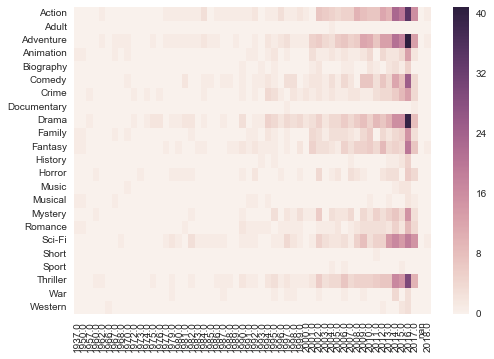

In [48]:
import seaborn as sns
sns.heatmap(df_genre_year)
plt.show()

#### B. Rating

In [50]:
## Extracting the year column
top500_IMDB_rating = top500_IMDB.ix[:, 'rating']

## Create a new dataframe containing information of genre and rating
top500_IMDB_genre_rating = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_rating['rating'] = pd.Series(top500_IMDB_rating, index = top500_IMDB_genre_rating.index)

In [51]:
rating_list = sorted(top500_IMDB_genre_rating['rating'].unique())
min(rating_list), max(rating_list)

(3.8999999999999999, 9.3000000000000007)

In [52]:
rating_list = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]

In [53]:
df_genre_rating = pd.DataFrame(columns=rating_list)

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(rating_list)):
    temp = top500_IMDB_genre.ix[:, :-1][top500_IMDB_genre_rating['rating'] > rating_list[i]-0.5][top500_IMDB_genre_rating['rating'] < rating_list[i]+0.5]
    temp.sum(axis = 0)
    df_genre_rating.iloc[:, i] = temp.sum(axis = 0)

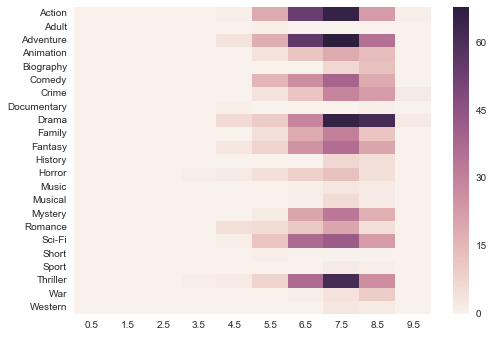

In [54]:
sns.heatmap(df_genre_rating)
plt.show()

#### C. Votes

In [55]:
## Extracting the year column
top500_IMDB_votes = top500_IMDB.ix[:, 'votes']

## Create a new dataframe containing information of genre and rating
top500_IMDB_genre_votes = top500_IMDB_genre.ix[:, :-1].copy()
top500_IMDB_genre_votes['votes'] = pd.Series(top500_IMDB_votes, index = top500_IMDB_genre_votes.index)

In [56]:
top500_IMDB_genre_votes = top500_IMDB_genre_votes[pd.notnull(top500_IMDB_votes)]

In [60]:
votes_list = np.linspace(0, 1800000, 19)


In [58]:
df_genre_votes = pd.DataFrame(columns=votes_list[:-1])

# Create a dataframe with number of films for a particular genre and year 
for i in range(0, len(votes_list)-1):
    temp = top500_IMDB_genre_votes.ix[:, :-1][top500_IMDB_genre_votes['votes'] > votes_list[i]][top500_IMDB_genre_votes['votes'] < votes_list[i+1]]
    temp.sum(axis = 0)
    df_genre_votes.iloc[:, i] = temp.sum(axis = 0)

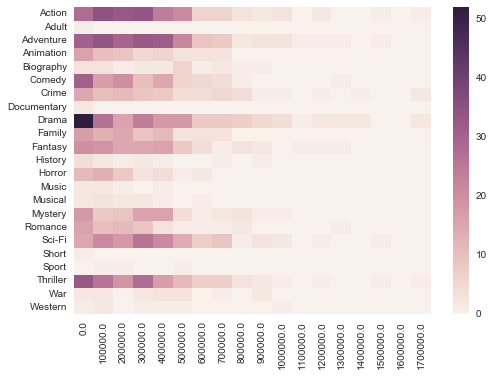

In [59]:
sns.heatmap(df_genre_votes)
plt.show()

#### 2.2.2 Qualitative:
- language
- country of release
- MAPP   

In [ ]:
# Zecai

#### 2.2.3 Production related:
- director
- writer
- distributor (company)
- major cast

In [1]:
# (1 sample) Wenshan

#### 2.2.4 Text Analysis:
- plot outline
- plot
- title
- reason for MPAA rating

In [2]:
# not now

--------

## 3. Challenges for Next Step 

Hints:
Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them

Zecai
- multiple genres / how many genres to predict
- assemble data (how much to sample? download the whole?

Danqing
- missing information / sparse data for some genres
- merge/combine two database (inconsistency)

Wenshan
- feature selection? 
- whether text analysis?